<a href="https://colab.research.google.com/github/Er-Manav/Indian-Currency-Recognition/blob/master/Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")


Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Uploading kaggle.json file

In [ ]:
from google.colab import files
my_file=files.upload()



Saving kaggle.json to kaggle.json


In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
my_dir="/content/drive/My Drive/aiprojects/money_detector"

loading our pkl file from drive

In [ ]:
predictor = load_learner(my_dir)

Defining my_predictor function 

In [ ]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class


Downloading dataset for testing

In [ ]:
!kaggle datasets download -d ermanav/indiancurrencydataset

 98% 281M/288M [00:01<00:00, 244MB/s]
100% 288M/288M [00:01<00:00, 240MB/s]


Unzipping the dataset

In [ ]:
!unzip "*.zip"

Archive:  indiancurrencydataset.zip
  inflating: test_data/010.jpg       
  inflating: test_data/0100.jpg      
  inflating: test_data/020.jpg       
  inflating: test_data/050.jpg       
  inflating: test_data/0No Money.jpg  
  inflating: test_data/1010.jpg      
  inflating: test_data/10100.jpg     
  inflating: test_data/1020.jpg      
  inflating: test_data/1050.jpg      
  inflating: test_data/10No Money.jpg  
  inflating: test_data/110.jpg       
  inflating: test_data/1100.jpg      
  inflating: test_data/1110.jpg      
  inflating: test_data/11100.jpg     
  inflating: test_data/1120.jpg      
  inflating: test_data/11200.jpg     
  inflating: test_data/112000.jpg    
  inflating: test_data/1150.jpg      
  inflating: test_data/11No Money.jpg  
  inflating: test_data/120.jpg       
  inflating: test_data/1210.jpg      
  inflating: test_data/12100.jpg     
  inflating: test_data/1220.jpg      
  inflating: test_data/122000.jpg    
  inflating: test_data/1250.jpg      
  inflati

In [ ]:
all_test_images=os.listdir("test_data")

100


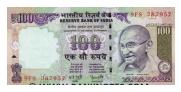

In [ ]:
idx=1
print(my_predictor("test_data/"+all_test_images[idx]))
img = open_image("test_data/"+all_test_images[idx])
img.show()

Importing cv2 library for making video

In [ ]:
import cv2
test_files=os.listdir("test_data")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("test_data/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [ ]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p -vf pad="width=ceil(iw/2)*2:height=ceil(ih/2)*2" ../moneyclassifier.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

Making Video😃😃

In [ ]:
!pip install -U kora
from kora.drive import upload_public

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.5.6)


In [ ]:
url = upload_public('moneyclassifier.mp4')

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

URL of video

In [ ]:
url


NameError: ignored